# Ranks of Winning Teams

In [1]:
import numpy
import pandas
from matplotlib import pyplot as plt
import json
import time
from glob import glob
import ast
from collections import Counter

In [2]:
#list of years (one folder per year)
years = glob('./data/events/*')

#list of events (the event folders are inside those year folders)
events = [glob(x+'/*') for x in years]

In [3]:
#reduce events list to 1D for easier iteration
eventlist = []
for i in range(len(events)):
    eventlist.extend(events[i])

In [4]:
#make an array of the awards and rankings data for all events
eventResults = []

for folder in eventlist:

    file = glob(folder+'/'+folder[18:]+'_rankings*')[-1]
    if len(file) == 0:
        continue
    with open(file,"r",encoding='utf8') as f:
        rankings = f.readlines()
        rankings = ast.literal_eval(rankings[0])

    file = glob(folder+'/'+folder[18:]+'_awards*')[-1]
    if len(file) == 0:
        continue
    with open(file,"r",encoding='utf8') as f:
        awards = f.readlines()
        awards = ast.literal_eval(awards[0])

    
    if len(awards) == 0 or len(rankings) == 0:
        continue
    
    eventResults.append([awards, rankings])

In [5]:
#use the awards and rankings data to find the ranks of the 3 winning teams

winningrank = []
alliancesrank = []

for e in range(len(eventResults)):
    allianceranks=[]
    for i in range(len(eventResults[e][0])):
        #awardtype=1 is the event winning alliance
        if eventResults[e][0][i]['award_type'] == 1:
            team1 = eventResults[e][0][i]['recipient_list'][0]['team_number']
            team2 = eventResults[e][0][i]['recipient_list'][1]['team_number']
            team3 = eventResults[e][0][i]['recipient_list'][2]['team_number']
            for j in range(len(eventResults[e][1])):
                if eventResults[e][1][j][1] == str(team1):
                    allianceranks.append(int(eventResults[e][1][j][0]))
                if eventResults[e][1][j][1] == str(team2):
                    allianceranks.append(int(eventResults[e][1][j][0]))
                if eventResults[e][1][j][1] == str(team3):
                    allianceranks.append(int(eventResults[e][1][j][0]))
                
                    
    winningrank.extend(allianceranks)
    alliancesrank.extend([allianceranks])

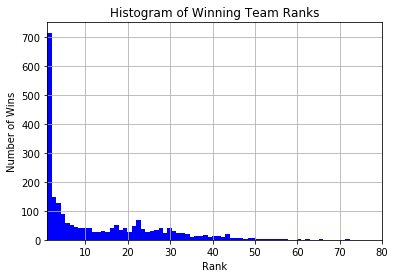

In [6]:
# plot histogram/bar chart of winning team ranks
x = winningrank
n, bins, patches = plt.hist(x, 80, facecolor='blue')
plt.xlabel('Rank')
plt.ylabel('Number of Wins')
plt.title('Histogram of Winning Team Ranks')
plt.axis([1, 80, 0, 750])
plt.grid(True)

plt.show()

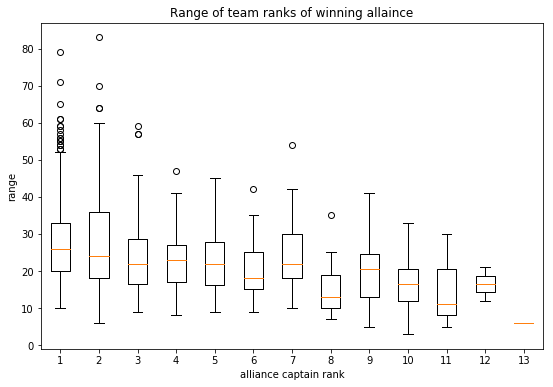

In [7]:
#box plot of range of alliance ranks in each winning alliance
x = [min(r) for r in alliancesrank if len(r)]
y = [max(r)-min(r) for r in alliancesrank if len(r)]

xs = list(set([min(r) for r in alliancesrank if len(r)]))
ys=[]
for xi in xs:
    ys.append([max(r)-min(r) for r in alliancesrank if len(r) and min(r) == xi])
    

y_pos = numpy.arange(len(y))

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(ys)
#plt.scatter(x,y)
plt.ylabel('range')
plt.xlabel('alliance captain rank')
plt.title('Range of team ranks of winning allaince')

plt.show()